<a href="https://colab.research.google.com/github/ajrotert/Machine-Learning/blob/master/HandlingImages.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Intro

Chapter 8. Handling Images

Machine Learning with Python Cookbook

##Setup

In [1]:
import cv2

cv2.__version__

'4.1.2'

##Loading Images


Loading images into numpy arrays

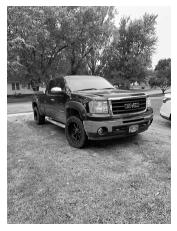

In [11]:
import numpy as np
from matplotlib import pyplot as plt

# Load image as grayscale
image = cv2.imread("/truck.jpeg", cv2.IMREAD_GRAYSCALE)
plt.imshow(image, cmap='gray'), plt.axis("off")
plt.show()

In [12]:
print(type(image))
print(image)
print(image.shape)

<class 'numpy.ndarray'>
[[159 163 158 ... 245 245 245]
 [162 160 159 ... 245 245 245]
 [146 153 157 ... 245 245 245]
 ...
 [124 130  98 ... 157 153 177]
 [130 124 102 ... 140 158 180]
 [128 120  91 ... 118 168 184]]
(4032, 3024)


In [13]:
# Load image in color
image_bgr = cv2.imread("/truck.jpeg", cv2.IMREAD_COLOR)

# Show pixel
image_bgr[0,0]

array([150, 165, 151], dtype=uint8)

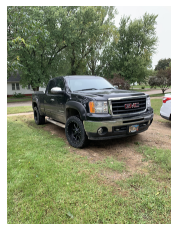

In [14]:
# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

##Saving Images


Save image at the provided path

In [15]:
cv2.imwrite("truck_new.jpg", image)

True

##Resizing Images

Resizing images as a part of pre-processing 

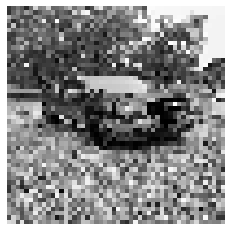

In [16]:
# Resize image to 50 pixels by 50 pixels
image_50x50 = cv2.resize(image, (50, 50))

# View image
plt.imshow(image_50x50, cmap="gray"), plt.axis("off")
plt.show()

##Cropping Images

Cropping images as a part of pre-processing

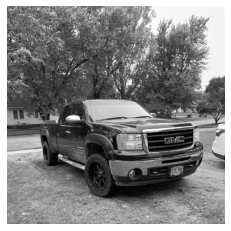

In [18]:
image_cropped = image[:3000,:3000]

# Show image
plt.imshow(image_cropped, cmap="gray"), plt.axis("off")
plt.show()

##Smoothing Images

Each pixel takes on the average value of its neighbors, based on a kernal. The size of the kernel affects how blurred the image is, larger kernels create smoother images. 

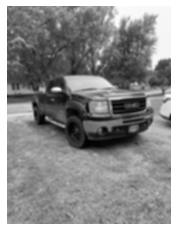

In [17]:
# Blur image with a 5x5 kernel
image_blurry = cv2.blur(image, (50,50))

# Show image
plt.imshow(image_blurry, cmap="gray"), plt.axis("off")
plt.show()

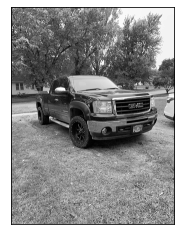

In [19]:
kernel = np.ones((5,5)) / 25.0

# Apply kernel
image_kernel = cv2.filter2D(image, -1, kernel)

# Show image
plt.imshow(image_kernel, cmap="gray"), plt.xticks([]), plt.yticks([])
plt.show()

##Sharpening Images

Create a kernel to highlight each pixel sharpening edges. 

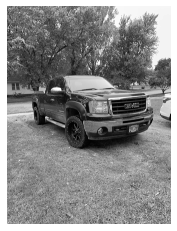

In [20]:
# Create kernel
kernel = np.array([[0, -1, 0],
                   [-1, 5,-1],
                   [0, -1, 0]])

# Sharpen image
image_sharp = cv2.filter2D(image, -1, kernel)

# Show image
plt.imshow(image_sharp, cmap="gray"), plt.axis("off")
plt.show()

##Enhancing Contrast

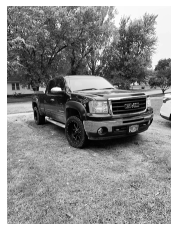

In [23]:
# Enhance image
image_enhanced = cv2.equalizeHist(image)

# Show image
plt.imshow(image_enhanced, cmap="gray"), plt.axis("off")
plt.show()


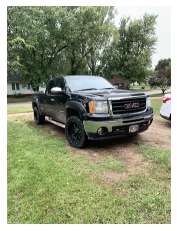

In [24]:
# Load image
image_bgr = cv2.imread("/truck.jpeg")

# Convert to YUV
image_yuv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2YUV)

# Apply histogram equalization
image_yuv[:, :, 0] = cv2.equalizeHist(image_yuv[:, :, 0])

# Convert to RGB
image_rgb = cv2.cvtColor(image_yuv, cv2.COLOR_YUV2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

##Isolating Colors

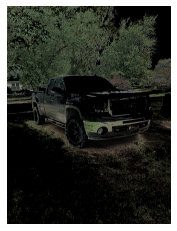

In [32]:
# Load image
image_bgr = cv2.imread('/truck.jpeg')

# Convert BGR to HSV
image_hsv = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2HSV)

# Define range of blue values in HSV
lower_blue = np.array([0,0,0])
upper_blue = np.array([100,100,150])

# Create mask
mask = cv2.inRange(image_hsv, lower_blue, upper_blue)

# Mask image
image_bgr_masked = cv2.bitwise_and(image_bgr, image_bgr, mask=mask)

# Convert BGR to RGB
image_rgb = cv2.cvtColor(image_bgr_masked, cv2.COLOR_BGR2RGB)

# Show image
plt.imshow(image_rgb), plt.axis("off")
plt.show()

##Binarizing Images

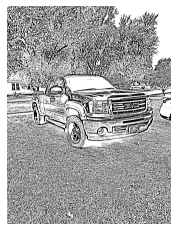

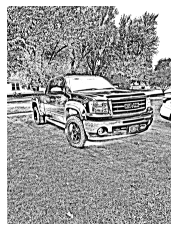

In [34]:
# Load image as grayscale
image_grey = cv2.imread("/truck.jpeg", cv2.IMREAD_GRAYSCALE)

# Apply adaptive thresholding
max_output_value = 255
neighborhood_size = 99
subtract_from_mean = 10
image_binarized = cv2.adaptiveThreshold(image_grey,
                                        max_output_value,
                                        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                        cv2.THRESH_BINARY,
                                        neighborhood_size,
                                        subtract_from_mean)

# Show image
plt.imshow(image_binarized, cmap="gray"), plt.axis("off")
plt.show()

# Apply cv2.ADAPTIVE_THRESH_MEAN_C
image_mean_threshold = cv2.adaptiveThreshold(image_grey,
                                             max_output_value,
                                             cv2.ADAPTIVE_THRESH_MEAN_C,
                                             cv2.THRESH_BINARY,
                                             neighborhood_size,
                                             subtract_from_mean)

# Show image
plt.imshow(image_mean_threshold, cmap="gray"), plt.axis("off")
plt.show()

##Removing Backgrounds

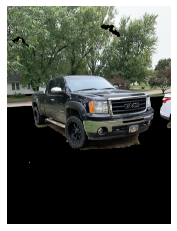

In [37]:
# Load image and convert to RGB
image_bgr = cv2.imread('/truck.jpeg')
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Rectangle values: start x, start y, width, height
rectangle = (0, 0, 4032, 3024)

# Create initial mask
mask = np.zeros(image_rgb.shape[:2], np.uint8)

# Create temporary arrays used by grabCut
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

# Run grabCut
cv2.grabCut(image_rgb, # Our image
            mask, # The Mask
            rectangle, # Our rectangle
            bgdModel, # Temporary array for background
            fgdModel, # Temporary array for background
            5, # Number of iterations
            cv2.GC_INIT_WITH_RECT) # Initiative using our rectangle

# Create mask where sure and likely backgrounds set to 0, otherwise 1
mask_2 = np.where((mask==2) | (mask==0), 0, 1).astype('uint8')

# Multiply image with new mask to subtract background
image_rgb_nobg = image_rgb * mask_2[:, :, np.newaxis]

# Show image
plt.imshow(image_rgb_nobg), plt.axis("off")
plt.show()

##Edge Detection

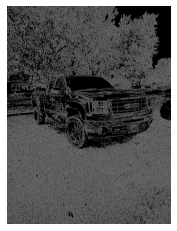

In [38]:
# Load image as grayscale
image_gray = cv2.imread("/truck.jpeg", cv2.IMREAD_GRAYSCALE)

# Calculate median intensity
median_intensity = np.median(image_gray)

# Set thresholds to be one standard deviation above and below median intensity
lower_threshold = int(max(0, (1.0 - 0.33) * median_intensity))
upper_threshold = int(min(255, (1.0 + 0.33) * median_intensity))

# Apply canny edge detector
image_canny = cv2.Canny(image_gray, lower_threshold, upper_threshold)

# Show image
plt.imshow(image_canny, cmap="gray"), plt.axis("off")
plt.show()

##Detecting Corners

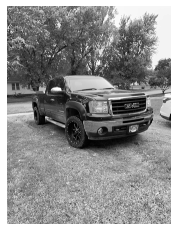

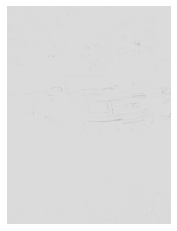

In [40]:
# Load image as grayscale
image_bgr = cv2.imread("/truck.jpeg")
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)
image_gray = np.float32(image_gray)

# Set corner detector parameters
block_size = 2
aperture = 29
free_parameter = 0.04

# Detect corners
detector_responses = cv2.cornerHarris(image_gray,
                                      block_size,
                                      aperture,
                                      free_parameter)

# Large corner markers
detector_responses = cv2.dilate(detector_responses, None)

# Only keep detector responses greater than threshold, mark as white
threshold = 0.02
image_bgr[detector_responses >
          threshold *
          detector_responses.max()] = [255,255,255]

# Convert to grayscale
image_gray = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(image_gray, cmap="gray"), plt.axis("off")
plt.show()

# Show potential corners
plt.imshow(detector_responses, cmap='gray'), plt.axis("off")
plt.show()

##Creating Features for Machine Learning

In [43]:
# Load image as grayscale
image = cv2.imread("/truck.jpeg", cv2.IMREAD_GRAYSCALE)

# Resize image to 1000 pixels by 1000 pixels
image_10x10 = cv2.resize(image, (1000, 1000))

# Convert image data to one-dimensional vector
image_10x10.flatten().shape

(1000000,)

##Encoding Mean Color as a Feature

In [44]:
# Load image as BGR
image_bgr = cv2.imread("truck.jpeg", cv2.IMREAD_COLOR)

# Calculate the mean of each channel
channels = cv2.mean(image_bgr)

# Swap blue and red values (making it RGB, not BGR)
observation = np.array([(channels[2], channels[1], channels[0])])

# Show mean channel values
observation

array([[0., 0., 0.]])

##Encoding Color Histograms as Features

In [0]:
# Load image
image_bgr = cv2.imread("truck.jpeg", cv2.IMREAD_COLOR)

# Convert to RGB
image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)

# Create a list for feature values
features = []

# Calculate the histogram for each color channel
colors = ("r","g","b")

# For each channel: calculate histogram and add to feature value list
for i, channel in enumerate(colors):
    histogram = cv2.calcHist([image_rgb], # Image
                        [i], # Index of channel
                        None, # No mask
                        [256], # Histogram size
                        [0,256]) # Range
    features.extend(histogram)

# Create a vector for an observation's feature values
observation = np.array(features).flatten()

# Show the observation's value for the first five features
observation[0:5]

##20.15 Classifying Images

In [47]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

# Set that the color channel value will be first
K.set_image_data_format("channels_first")

# Set seed
np.random.seed(0)

# Set image information
channels = 1
height = 28
width = 28

# Load data and target from MNIST data
(data_train, target_train), (data_test, target_test) = mnist.load_data()

# Reshape training image data into features
data_train = data_train.reshape(data_train.shape[0], channels, height, width)

# Reshape test image data into features
data_test = data_test.reshape(data_test.shape[0], channels, height, width)

# Rescale pixel intensity to between 0 and 1
features_train = data_train / 255
features_test = data_test / 255

# One-hot encode target
target_train = np_utils.to_categorical(target_train)
target_test = np_utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]

# Start neural network
network = Sequential()

# Add convolutional layer with 64 filters, a 5x5 window, and ReLU activation function
network.add(Conv2D(filters=64,
                   kernel_size=(5, 5),
                   input_shape=(channels, width, height),
                   activation='relu'))

# Add max pooling layer with a 2x2 window
network.add(MaxPooling2D(pool_size=(2, 2)))

# Add dropout layer
network.add(Dropout(0.5))

# Add layer to flatten input
network.add(Flatten())

# # Add fully connected layer of 128 units with a ReLU activation function
network.add(Dense(128, activation="relu"))

# Add dropout layer
network.add(Dropout(0.5))

# Add fully connected layer with a softmax activation function
network.add(Dense(number_of_classes, activation="softmax"))

# Compile neural network
network.compile(loss="categorical_crossentropy", # Cross-entropy
                optimizer="rmsprop", # Root Mean Square Propagation
                metrics=["accuracy"]) # Accuracy performance metric

# Train neural network
network.fit(features_train, # Features
            target_train, # Target
            epochs=2, # Number of epochs
            verbose=0, # Don't print description after each epoch
            batch_size=1000, # Number of observations per batch
            validation_data=(features_test, target_test)) # Data for evaluation

Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step











Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




##20.16 Improving Performance with Image Augmentation

In [0]:
# Load library
from keras.preprocessing.image import ImageDataGenerator

# Create image augmentation
augmentation = ImageDataGenerator(featurewise_center=True, # Apply ZCA whitening
                                  zoom_range=0.3, # Randomly zoom in on images
                                  width_shift_range=0.2, # Randomly shift images
                                  horizontal_flip=True, # Randomly flip images
                                  rotation_range=90) # Randomly rotate

# Process all images from the directory 'raw/images'
#augment_images = augmentation.flow_from_directory("raw/images", # Image folder
#                                                  batch_size=32, # Batch size
#                                                  class_mode="binary", # Classes
#                                                  save_to_dir="processed/images")

# Train neural network
#network.fit_generator(augment_images,
#                      #Number of times to call the generator for each epoch
#                      steps_per_epoch=2000,
#                      # Number of epochs
#                      epochs=5,
#                      # Test data generator
#                      validation_data=augment_images_test,
                      # Number of items to call the generator
                      # for each test epoch
#                      validation_steps=800)